# How much should we prepare for the event sponsorship budget in 2018?

* [Exploring the Data](#Exploring-the-Data)
* [Creating a Visualization](#Creating-a-Visualization)
* [Modeling the Data](#Modeling-the-Data)

## Exploring the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/sponsorship-budget.csv')
df.head()

,year,revenue,number of employees,sponsor budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,NaN,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


In [3]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,year,revenue,number_of_employees,sponsor_budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,NaN,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


### Handling Missing Data 

See the package `missingno` at https://github.com/ResidentMario/missingno.

In [4]:
!pip install missingno

In [5]:
import missingno as msno

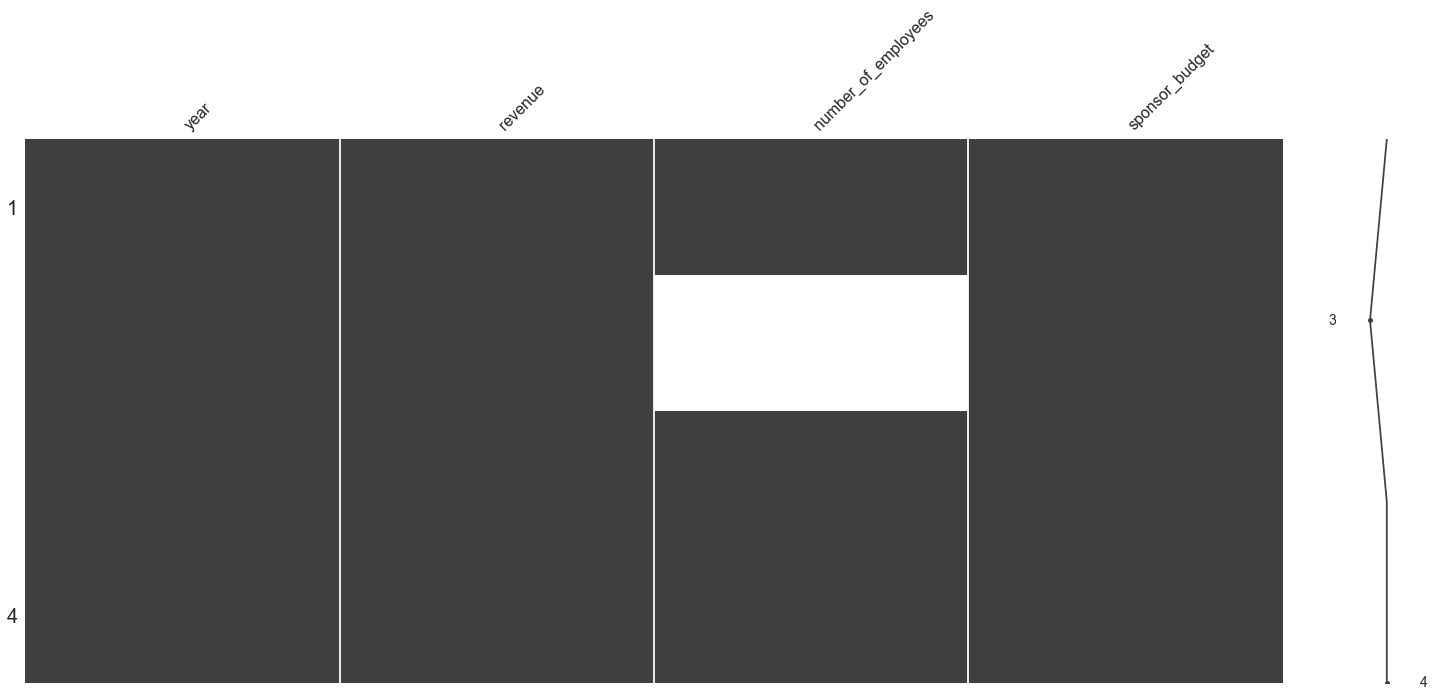

In [6]:
msno.matrix(df)

Fill in the missing data with some random value.

In [7]:
df.number_of_employees = df.number_of_employees.fillna(85)

In [8]:
df.head()

,year,revenue,number_of_employees,sponsor_budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,85.0,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


## Creating a Visualization

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

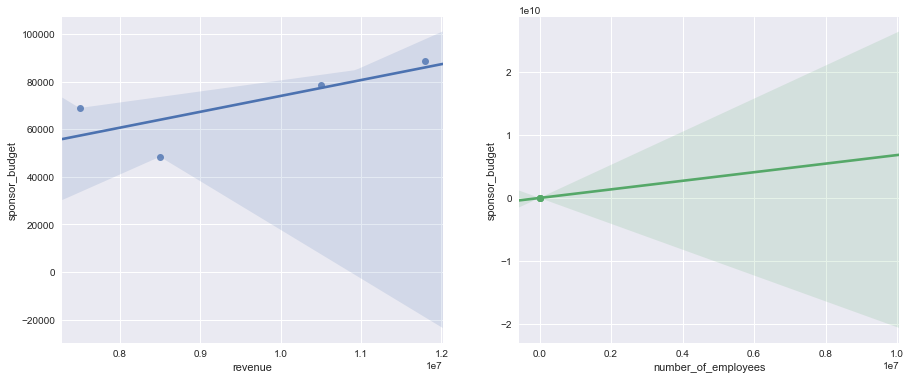

In [10]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.regplot('revenue', 'sponsor_budget', data=df, ax=ax[0])
sns.regplot('number_of_employees', 'sponsor_budget', data=df, ax=ax[1]);

## Modeling the Data

We'll try with a very simple approach that uses the data in the previous month to predict the budget in the next month as feature. We then use the linear regression model to predict the budget in 2018. Let's have a look at the data again.

In [11]:
df.head()

,year,revenue,number_of_employees,sponsor_budget
0,2014,7500000.50,75.0,69000.14
1,2015,8500000.75,85.0,48500.50
2,2016,10500000.78,109.0,78500.30
3,2017,11800000.19,113.0,89000.84


### Importing the Model

In [12]:
from sklearn.linear_model import LinearRegression

### Selecting a Set of Features

In [35]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [36]:
def get_rmse(scores):
    mse_scores = -scores
    rmse_scores = np.sqrt(mse_scores)
    return rmse_scores.mean()

In [37]:
y = df[df.year >= 2015]['sponsor_budget']

In [38]:
X = df[df.year <= 2016][['revenue', 'number_of_employees']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

39541.999418465071

In [39]:
X = df[df.year <= 2016][['revenue']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

39541.999417865081

In [40]:
X = df[df.year <= 2016][['number_of_employees']]
lr = LinearRegression()
scores = cross_val_score(lr, X, y, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

45541.966467816324

### Normalizing Data

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [43]:
X = df[df.year <= 2016][['revenue', 'number_of_employees']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

2.4556130301959431

In [44]:
X = df[df.year <= 2016][['revenue']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

2.3041660512343558

In [45]:
X = df[df.year <= 2016][['number_of_employees']]
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

lr = LinearRegression()
scores = cross_val_score(lr, X_scaled, y_scaled, cv=2, scoring='neg_mean_squared_error')
get_rmse(scores)

2.6537922863401189

### Creating a Final Model

In [46]:
selected_features = ['revenue']
label = 'sponsor_budget'

In [47]:
X = df[df.year <= 2016][selected_features]
y = df[df.year >= 2015][label]

In [55]:
scaler_x = StandardScaler()
scaler_x.fit(X)
X_scaled = scaler_x.transform(X)

scaler_y = StandardScaler()
scaler_y.fit(y.values.reshape(-1, 1))
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

In [49]:
lr = LinearRegression()
lr.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print(f'Coefficients: {lr.coef_}')
print(f'Independent Term: {lr.intercept_}')

Coefficients: [[ 0.89549625]]
Independent Term: [ -5.18104078e-16]


### Making a Prediction

In [51]:
X_test = df[df.year == 2017][selected_features]
X_test.head()

,revenue
3,11800000.19


In [52]:
X_test_scaled = scaler_x.transform(X_test)
X_test_scaled

array([[ 2.37862447]])

In [53]:
results = lr.predict(X_test_scaled)

In [54]:
print(f"Let's prepare the event sponsorship budget (in 2018) around {scaler_y.inverse_transform(results)} baht!")

Let's prepare the event sponsorship budget (in 2018) around [[ 108554.51277154]] baht!
